In [1]:
# Import required modules
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import re
import pprint
import glob
import pickle
import traceback
import logging
import os.path, time
from datetime import datetime, timedelta

# CSV files we have got so far

In [2]:
import os
for index,i in enumerate(sorted(os.listdir("csv/"))):
    print(index,i)

0 Business & entrepreneur.csv
1 Business & entrepreneurAuthors.csv
2 Commercial events.csv
3 Commercial eventsAuthors.csv
4 Complaints corner.csv
5 Complaints cornerAuthors.csv
6 Concerts.csv
7 ConcertsAuthors.csv
8 Daily life.csv
9 Daily lifeAuthors.csv
10 Education.csv
11 EducationAuthors.csv
12 Employment.csv
13 EmploymentAuthors.csv
14 Entertainment & dining.csv
15 Entertainment & diningAuthors.csv
16 Family mattershealth.csv
17 Family mattershealthAuthors.csv
18 Financebankingtaxation.csv
19 FinancebankingtaxationAuthors.csv
20 Food and drink.csv
21 Food and drinkAuthors.csv
22 Insurance.csv
23 InsuranceAuthors.csv
24 Introductions.csv
25 IntroductionsAuthors.csv
26 Language corner.csv
27 Language cornerAuthors.csv
28 Leaving Switzerland.csv
29 Leaving SwitzerlandAuthors.csv
30 Othergeneral.csv
31 OthergeneralAuthors.csv
32 Permitsvisasgovernment.csv
33 PermitsvisasgovernmentAuthors.csv
34 Pet corner.csv
35 Pet cornerAuthors.csv
36 Social events.csv
37 Social eventsAuthors.csv
38 

# Load all data at once

Right now the csv named as "*Authors" are the ones more updated. This ones have the information about the threads and it creator.

As a riminder of the data structure:

    -Thread: Name of the thread.
    -User: Creator of the thread.
    -Views: Number of views of that thread
    -Replies: Number of replies in that thread
    -Location: Location of the user
    -Date: Date of creation of the thread
    -Posts: All posts of each thread
    -User_posts:
    -Since: Date of registration of the user
    -Exp: Level of experience of the user.
    -Thanked: Number of times been thanked of each user
    -Groaned: Number of times been groaned of each user
    -Reputation: Level of reputation of the user.


In [3]:
dfAuthors={}
filenames = [fn for fn in glob.glob("csv/*.csv") 
         if os.path.basename(fn).endswith('Authors.csv')]
for index,filename in enumerate(filenames):

    df = pd.read_csv(filename, header=0,sep='\t',index_col=0)
    df = df[['topic','thread','user','views','replies','location','date','post','user_posts','since','exp','thanked','groaned','reputation']]
    dfAuthors[re.sub(r'.csv','',os.path.basename(filename))]=df
print(filenames,dfAuthors.keys())

dfAuthors['ConcertsAuthors'].head(3)
# dfAuthors['Business & entrepreneurAuthors'][['thread','user','date','post','user_posts','since','exp','thanked','groaned','reputation']]

['csv/Business & entrepreneurAuthors.csv', 'csv/ConcertsAuthors.csv', 'csv/EducationAuthors.csv', 'csv/PermitsvisasgovernmentAuthors.csv', 'csv/Commercial eventsAuthors.csv', 'csv/Travelday tripsfree timeAuthors.csv', 'csv/Daily lifeAuthors.csv', 'csv/EmploymentAuthors.csv', 'csv/TransportationdrivingAuthors.csv', 'csv/Language cornerAuthors.csv', 'csv/Swiss news via The LocalAuthors.csv', 'csv/TVinternettelephoneAuthors.csv', 'csv/OthergeneralAuthors.csv', 'csv/Swiss politicsnewsAuthors.csv', 'csv/IntroductionsAuthors.csv', 'csv/Social eventsAuthors.csv', 'csv/Food and drinkAuthors.csv', 'csv/Leaving SwitzerlandAuthors.csv', 'csv/FinancebankingtaxationAuthors.csv', 'csv/Family mattershealthAuthors.csv', 'csv/InsuranceAuthors.csv', 'csv/Entertainment & diningAuthors.csv', 'csv/Complaints cornerAuthors.csv', 'csv/Pet cornerAuthors.csv', 'csv/Sports  Fitness  Beauty  WellnessAuthors.csv'] dict_keys(['Sports  Fitness  Beauty  WellnessAuthors', 'Social eventsAuthors', 'Leaving SwitzerlandA

,topic,thread,user,views,replies,location,date,post,user_posts,since,exp,thanked,groaned,reputation
0,Concerts,"Switzerland Gigs ""Heads Up""",Yokine,152605,1100,Perthia,"06.05.2009, 16:20",Mod Insert: Please . Can't be bothered si...,1233.0,Mar 2006,5.0,"['901', '444']","['1', '1']",6
1,Concerts,Small bars/places with acoustic livemusic?,JHC,978,5,"Lenzburg, Aargau","19.11.2016, 19:45",\r\n\t\t\t\r\n\t\t\tI am living in Kanton Aar...,3.0,Nov 2016,0.0,"['0', '0']","['0', '0']",0
2,Concerts,Jazz clubs Zurich?,aromeroa,3869,16,Spain,"28.11.2015, 22:48",\r\n\t\t\t\r\n\t\t\tHello there! \r\nI am a...,6.0,Jul 2015,0.0,"['0', '0']","['0', '0']",0


# Plotting
We are goin to plot several statistics: The most viewed thread per topic, most replied and viewd threads...

We will first transform our string data to integers, so we can plot it. Then we will join al interesting data in a df and obtain general statistical information.

In [4]:
for key in dfAuthors:
    dfAuthors[key]['views']=dfAuthors[key]['views'].apply(lambda x: int(x.replace(',','').replace('-','0')) if type(x)== str else x)
    dfAuthors[key]['replies']=dfAuthors[key]['replies'].apply(lambda x: int(str(x).replace(',','').replace('-','0'))if type(x)== str else x)
dfAuthors['ConcertsAuthors'].head(3)

,topic,thread,user,views,replies,location,date,post,user_posts,since,exp,thanked,groaned,reputation
0,Concerts,"Switzerland Gigs ""Heads Up""",Yokine,152605,1100,Perthia,"06.05.2009, 16:20",Mod Insert: Please . Can't be bothered si...,1233.0,Mar 2006,5.0,"['901', '444']","['1', '1']",6
1,Concerts,Small bars/places with acoustic livemusic?,JHC,978,5,"Lenzburg, Aargau","19.11.2016, 19:45",\r\n\t\t\t\r\n\t\t\tI am living in Kanton Aar...,3.0,Nov 2016,0.0,"['0', '0']","['0', '0']",0
2,Concerts,Jazz clubs Zurich?,aromeroa,3869,16,Spain,"28.11.2015, 22:48",\r\n\t\t\t\r\n\t\t\tHello there! \r\nI am a...,6.0,Jul 2015,0.0,"['0', '0']","['0', '0']",0


In [5]:
dfContainer={}
filenames = [fn for fn in glob.glob("old_csv/*.csv") 
         if not os.path.basename(fn).endswith('Authors.csv')]
for index,filename in enumerate(filenames):
    df = pd.read_csv(filename, header=0,sep='\t',index_col=0)
    dfContainer[re.sub(r'.csv','',os.path.basename(filename))]=df

dfContainer['Transportationdriving'].head(2)

,hrefs,posts,replies,threads,views
0,http://www.englishforum.ch/transportation-driv...,"\r\n\t\t\t\r\n\t\t\tSince January 1 2013, the...",575,"Serious Speeding - the law, the fines.","134,880"
1,http://www.englishforum.ch/transportation-driv...,"\r\n\t\t\t\r\n\t\t\tHello, \nI bought a ca...",91,Car and engine cleaning pre mfk test,"37,509"


## Join DF to save

It will be usefull to concat all the df, so we can easily find the most viewed and replied threads. It will also facilitate the work for the ML

In [6]:
dfJoin=pd.DataFrame()
for index,df in enumerate(dfAuthors):
    dfJoin=dfJoin.append(dfAuthors[df],ignore_index=True)
dfJoin['views']=dfJoin['views'].apply(lambda x: int(x.replace(',','').replace('-','0')) if type(x)== str else x)
dfJoin['replies']=dfJoin['replies'].apply(lambda x: int(str(x).replace(',','').replace('-','0'))if type(x)== str else x)
suma=0
for key in dfContainer:
    suma+=len(dfContainer[key])
print('dfJoin vs dfContainer\nlen dataframes',suma,len(dfJoin))
print('3 removed from Lugano')
print('len topics',len(dfJoin['topic'].unique()),len(dfContainer))

dfJoin vs dfContainer
len dataframes 107499 107494
3 removed from Lugano
len topics 25 25


## Folium MAP


In [7]:
print(len(dfJoin),len(dfJoin.values))
# dfJoin
dfJoin.head(2)
# we remove Nan location rows
dfJoin=dfJoin[dfJoin.location.notnull()]

# we need to uppercase all location values
dfJoin['location']=dfJoin['location'].apply(lambda x: x.upper())

# now we declare all the canton names and 
# swiss locator it's a list containing every dictionary to obtain the ABBREVIATION CODE for the map
swiss_locator=[{'ZÜRICH':'ZH','ZURICH':'ZH'},
               {'ZUG':'ZG'},
               {'VAUD':'VD','LAUSANNE':'VD','WAADT':'VD'},
               {'VALAIS':'VS','SION':'VS','WAILLIS':'VS'},
               {'URI':'UR','ALTDORF':'UR'},
               {'TICINO':'TI','TESSIN':'TI','BELLINZONA':'TI','LUGANO':'TI'},
               {'THURGAU':'TG','THURGOVIA':'TG','FRAUENFELD':'TG'},
               {'ST. GALLEN':'SG','SAINT-GALL':'SG'},
               {'SOLOTHURN':'SO','SOLEURE':'SO'},
               {'SCHYWZ':'SZ'},
               {'SCHAFFHAUSEN':'SH','SCHAFFHOUSE':'SH'},
               {'OBWALDEN':'OW','OBWALD':'OW','SARNEN':'OW'},
               {'NIDWALDEN':'NW','Stans':'NW'},
               {'NEUCHÂTEL':'NE','NEUCHATEL':'NE','NEUENBURG':'NE'},
               {'LUZERN':'LU','LUCERNE':'LU'},
               {'JURA':'JU','DELÈMONT':'JU'},
               {'GRAUBÛNDEN':'GR','CHUR':'GR','GRISONS':'GR'},
               {'GLARIS':'GL','GLARUS':'GL'},
               {'GENÈVE':'GENEVE','GENEVE':'GE','GENEVA':'GE'},
               {'FRIBOURG':'FR','FREIBOURG':'FR'},
               {'BERN':'BE','BERNE':'BE'},
               {'BASEL-CITY':'BS','BASEL-STADT':'BS','BASEL':'BS'},
               {'BASEL-COUNTRY':'BL','BASEL-LANDSCHAFT':'BS','LIESTAL':'BS'},
               {'APPENZELL INNERRHODEN':'AI','APPENZELL':'AI'},
               {'APPENZELL AUSSERRHODEN':'AR','HERISAU':'AR'},
               {'AARGAU':'AG','AARAU':'AG','BADEN':'AG'}
              ]
allIndexes=[]
indexes=set()

for canton in swiss_locator:
    aux=[]
    indexes_list=None
    for pattern in canton:
        indexes_list=dfJoin.loc[dfJoin.location.str.contains(pattern)].index
        for i in indexes_list:
            indexes.add(int(i))
        aux.append(indexes)
    allIndexes.append(aux)
    aux=[]

107494 107494


In [8]:
locationsInSwitzerland=0
for i in allIndexes:
    locationsInSwitzerland+=len(i)
#     print(len(i))
print('number of topics:',len(allIndexes),'different keys used:',locationsInSwitzerland,'dfJoinlocationvalues:'\
      ,len(dfJoin.location),'number of values found:',len(indexes))
# print(i)

number of topics: 26 different keys used: 62 dfJoinlocationvalues: 107296 number of values found: 65206


In [10]:
# now we fetched around 80% of the user's locations, let's parse them
changed=0
for index, row in dfJoin.iterrows():
    if(index in indexes):
        for canton in swiss_locator:
            for key in canton:
                if(key in row['location'] and not changed):
                    dfJoin.loc[index,'location']=canton[key]
                    changed=1
    changed=0


In [11]:
# we should mind the abbreviations too for locations like 'Lausanne, VD'
changed=0
for index, row in dfJoin.iterrows():
    if(index in indexes):
        for canton in swiss_locator:
            if(list(canton.values())[0] in row['location'] and not changed):
                    dfJoin.loc[index,'location']=list(canton.values())[0]
                    changed=1

    changed=0

In [12]:
results=set()
cantons=dfJoin['location'].value_counts().index
usersAcc=dfJoin['location'].value_counts()
for i in range(len(cantons)):
    for cantonDec in swiss_locator:
        if(cantons[i]==list(cantonDec.values())[0]):
            results.add((cantons[i],usersAcc[i]))
            
print(results,len(results))
print(sorted(results))

{('SG', 293), ('SO', 203), ('TG', 542), ('JU', 27), ('AR', 13), ('AI', 155), ('SH', 381), ('NE', 1213), ('UR', 196), ('AG', 2086), ('BS', 9282), ('ZG', 2746), ('FR', 994), ('GL', 223), ('VS', 441), ('GE', 5036), ('GR', 111), ('OW', 40), ('ZH', 30338), ('LU', 1500), ('BE', 2743), ('SZ', 287), ('NW', 55), ('TI', 1219), ('VD', 6992)} 25
[('AG', 2086), ('AI', 155), ('AR', 13), ('BE', 2743), ('BS', 9282), ('FR', 994), ('GE', 5036), ('GL', 223), ('GR', 111), ('JU', 27), ('LU', 1500), ('NE', 1213), ('NW', 55), ('OW', 40), ('SG', 293), ('SH', 381), ('SO', 203), ('SZ', 287), ('TG', 542), ('TI', 1219), ('UR', 196), ('VD', 6992), ('VS', 441), ('ZG', 2746), ('ZH', 30338)]


In [13]:
from sklearn import preprocessing as preprocessing
# list(results)[_][0]
abbreviationsCanton=[]
valuesCanton=[]
for abb,val in results:
    abbreviationsCanton.append(abb)
    valuesCanton.append(val)

# abbreviationsCanton.append('AG')
abbreviationsCanton.append('BL')
# valuesCanton.append(0)
valuesCanton.append(0)
preprocessing.normalize(valuesCanton)

/home/josele/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[  8.80478256e-03,   6.10024184e-03,   1.62873452e-02,
          8.11362215e-04,   3.90655881e-04,   4.65782012e-03,
          1.14492224e-02,   3.64511988e-02,   5.88988867e-03,
          6.26852437e-02,   2.78928299e-01,   8.25185423e-02,
          2.98701497e-02,   6.70125089e-03,   1.32522495e-02,
          1.51334078e-01,   3.33560022e-03,   1.20201810e-03,
          9.11670625e-01,   4.50756786e-02,   8.24283910e-02,
          8.62447984e-03,   1.65277488e-03,   3.66315015e-02,
          2.10112763e-01,   0.00000000e+00]])

Map of the distribution of the users over the cantons.

In [60]:
import folium
county_geo = r'ch-cantons.topojson.json'
dfMap=pd.DataFrame({'CANTON':abbreviationsCanton,'users_per_canton':1.* np.log10(valuesCanton)})
# habria que hacer una nueva columna 'users_per_canton' , tal que haga un group by de los locations 
map_2 = folium.Map(location=[46.8, 8.5], zoom_start=8)
map_2.choropleth(geo_path=county_geo, data=dfMap,
               columns=['CANTON', 'users_per_canton'],
               key_on='feature.id',
               threshold_scale=[0, 2, 4, 6, 8, 10],
               fill_color='YlOrRd', line_opacity=0.3,
               legend_name='Users location Amount (%)',
                topojson = 'objects.cantons')
map_2.save('map_2.html')
map_2

Pie plot of the users location:

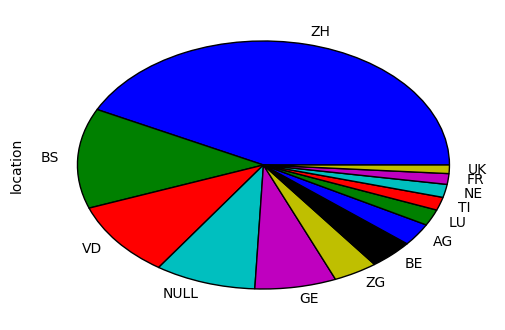

In [78]:
location_serie=dfJoin['location'].value_counts()
location_serie[:13].plot(kind='pie')
plt.show()

### The 2 most viewed threads per topic

We will like to give a fast look to all the topics and see which are the thread more relevants (per this ones). This is the reason for the next plot. 

/home/josele/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


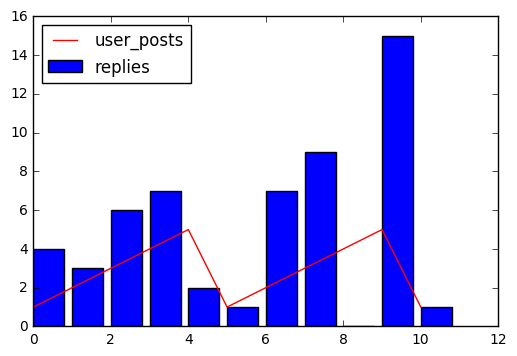

,user_posts,replies
0,182.0,34
1,182.0,4
2,182.0,4
3,7375.0,0
4,7375.0,0
5,7375.0,0
6,13.0,2
7,2.0,4
8,6.0,16
9,5157.0,9


In [22]:

fig = plt.figure()
ax = fig.gca()

xs = np.arange(len(dfAuthors[list(dfAuthors.keys())[0]]['user_posts'].ix[:10]))
yss=dfAuthors[list(dfAuthors.keys())[0]]['user_posts'].ix[:10]
ys = dfAuthors[list(dfAuthors.keys())[0]]['replies'].ix[:10]
yq = dfAuthors[list(dfAuthors.keys())[0]]['views'].ix[:10]
ys=[1,2,3,4,5,1,2,3,4,5,1]
yss=[5,5,5,5,1,3,3,3,3,3,1]
yxxx=[4,3,6,7,2,1,7,9,0,15,1]
ax.set_color_cycle(['red', 'green','yellow','orange']) 
# ax.bar(xs, yss)
ax.bar(xs,yxxx)
ax.plot(xs, ys)

ax.legend(['user_posts','replies','aaa'],loc='best')
plt.show(ax)
dfAuthors[list(dfAuthors.keys())[0]][['user_posts','replies']].ix[:10]

In [23]:
moreViews=pd.DataFrame()
Views=pd.DataFrame()
viewsStats=pd.DataFrame()
repliesStats=pd.DataFrame()
for index,key in enumerate(dfAuthors):
#     dfContainer[key].views=dfContainer[key].apply(lambda x: int(x[4].replace(',','').replace('-','0')),axis=1)
    viewsStats[key]=dfAuthors[key].describe()['views']
    repliesStats[key]=dfAuthors[key].describe()['replies']
    temp=dfAuthors[key][['thread','views']]
    temp2=temp.sort_values('views',ascending=0)[:2]['views']
    temp2.index=[np.arange(2)]
    Views[key]=temp2
    temp=temp.sort_values('views',ascending=0)[:2]
    temp['index2']=key
    temp.index=[temp.index2,temp.thread]
    temp=temp.drop(['index2','thread'],1)
    moreViews=moreViews.append(temp)


/home/josele/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


The next figure shows us the the most 2 viewed thread per topic


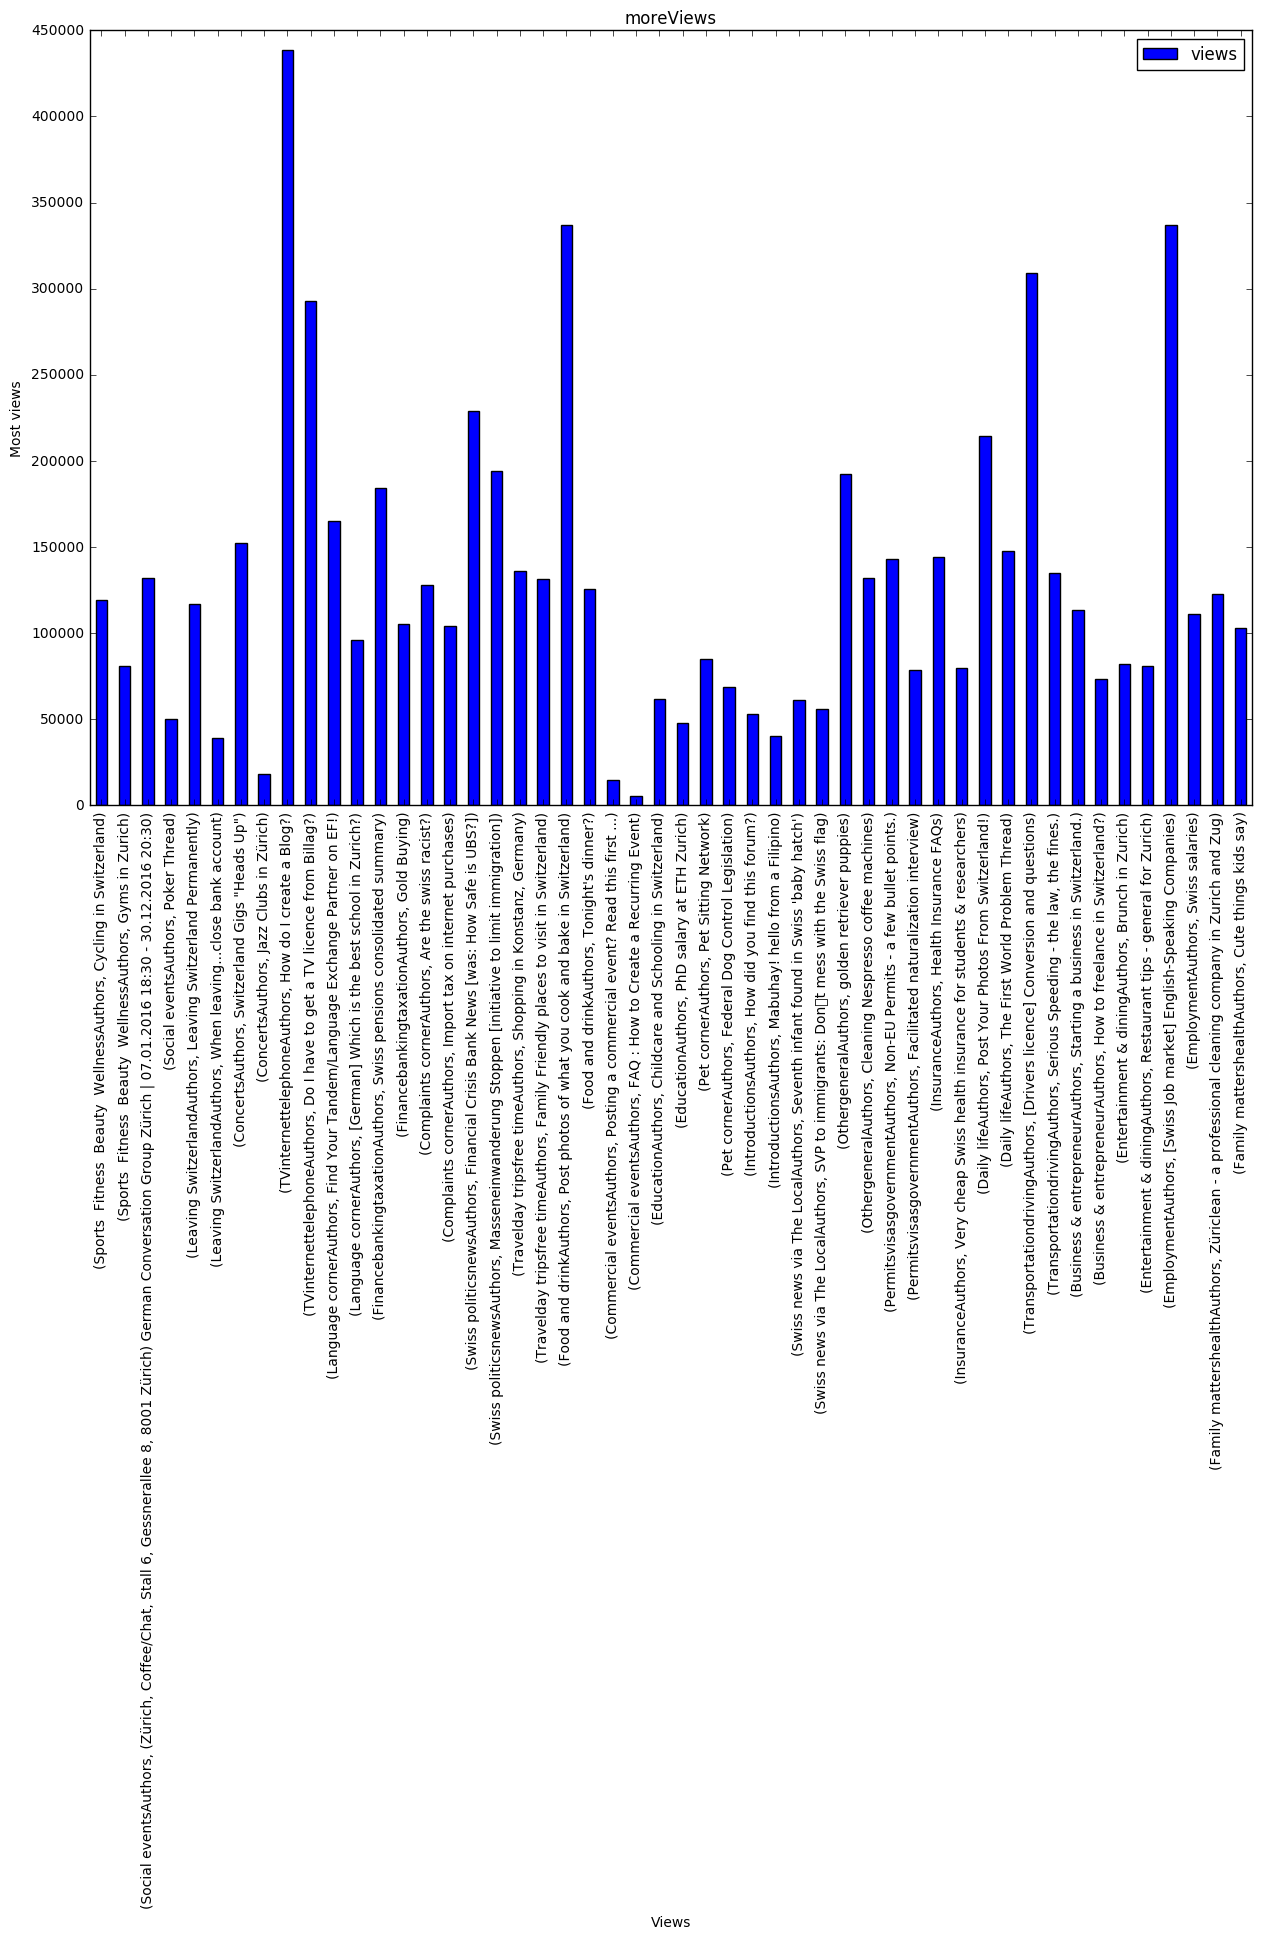

views
index2                                   thread                                                    
Sports  Fitness  Beauty  WellnessAuthors Cycling in Switzerland                              119106
                                         Gyms in Zurich                                       80977
Social eventsAuthors                     (Zürich, Coffee/Chat, Stall 6, Gessnerallee 8, ...  132178
                                         Poker Thread                                         49864
Leaving SwitzerlandAuthors               Leaving Switzerland Permanently                     117144
                                         When leaving...close bank account                    39045
ConcertsAuthors                          Switzerland Gigs "Heads Up"                         152605
                                         Jazz Clubs in Zürich                                 18052
TVinternettelephoneAuthors               How do I create a Blog?                             438685
                                         Do I have to get a TV licence from Billag?          292818

In [28]:
moreViews.head(10)
print("The next figure shows us the the most 2 viewed thread per topic")
moreViews.plot.bar(figsize=(15,10))
plt.title('moreViews')
plt.xlabel('Threads')
plt.ylabel('Views')
# Views.plot(kind='bar',figsize=(15,10))
plt.title('moreViews')
plt.xlabel('Views')
plt.ylabel('Most views')
plt.show()
moreViews.head(10)

In [29]:
viewsStats

,Sports Fitness Beauty WellnessAuthors,Social eventsAuthors,Leaving SwitzerlandAuthors,ConcertsAuthors,TVinternettelephoneAuthors,Language cornerAuthors,FinancebankingtaxationAuthors,Complaints cornerAuthors,Swiss politicsnewsAuthors,Travelday tripsfree timeAuthors,...,Swiss news via The LocalAuthors,OthergeneralAuthors,PermitsvisasgovernmentAuthors,InsuranceAuthors,Daily lifeAuthors,TransportationdrivingAuthors,Business & entrepreneurAuthors,Entertainment & diningAuthors,EmploymentAuthors,Family mattershealthAuthors
count,5664.000000,17.000000,1011.000000,848.000000,5556.000000,3028.000000,5776.000000,3054.000000,1790.000000,3844.000000,...,1150.000000,8187.000000,7365.000000,1959.000000,11390.000000,7881.000000,2117.000000,1729.000000,6206.000000,7284.000000
mean,2132.431321,14733.235294,2575.684471,1622.370283,2934.446364,2682.833554,2808.274931,4427.314997,4728.116760,2437.736993,...,1129.997391,2730.984488,1911.913781,2416.063298,3148.928183,2537.295140,2282.867737,3313.116252,2881.488237,2713.388797
std,3542.596680,32585.474601,4708.098245,5346.421560,8780.454169,5792.833416,5025.480927,6728.563269,10655.982719,4509.482958,...,3194.108654,4930.084400,3338.595089,4407.505635,5914.934703,5405.366332,3858.961418,5277.330614,6447.636503,4086.472894
min,0.000000,166.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,763.750000,593.000000,1088.000000,925.500000,984.750000,928.750000,1044.750000,1510.500000,1313.000000,941.000000,...,445.250000,940.000000,820.000000,1122.500000,947.000000,907.000000,1045.000000,1145.000000,1048.000000,987.000000
50%,1209.000000,2514.000000,1620.000000,1160.000000,1536.500000,1420.000000,1641.500000,2676.000000,2215.500000,1460.000000,...,543.000000,1514.000000,1220.000000,1629.000000,1648.500000,1457.000000,1489.000000,1801.000000,1619.500000,1652.000000
75%,2232.750000,10392.000000,2614.000000,1523.750000,2762.250000,2533.000000,2884.500000,5083.250000,4578.250000,2486.000000,...,745.000000,2777.000000,2017.000000,2572.500000,3307.000000,2655.000000,2424.000000,3395.000000,2885.750000,2999.000000
max,119106.000000,132178.000000,117144.000000,152605.000000,438685.000000,165236.000000,184224.000000,127714.000000,228928.000000,136077.000000,...,61076.000000,192340.000000,142892.000000,144466.000000,214706.000000,309410.000000,113495.000000,82366.000000,337121.000000,122699.000000


In [30]:
repliesStats

,Sports Fitness Beauty WellnessAuthors,Social eventsAuthors,Leaving SwitzerlandAuthors,ConcertsAuthors,TVinternettelephoneAuthors,Language cornerAuthors,FinancebankingtaxationAuthors,Complaints cornerAuthors,Swiss politicsnewsAuthors,Travelday tripsfree timeAuthors,...,Swiss news via The LocalAuthors,OthergeneralAuthors,PermitsvisasgovernmentAuthors,InsuranceAuthors,Daily lifeAuthors,TransportationdrivingAuthors,Business & entrepreneurAuthors,Entertainment & diningAuthors,EmploymentAuthors,Family mattershealthAuthors
count,5664.000000,17.000000,1011.000000,848.000000,5556.000000,3028.000000,5776.000000,3054.000000,1790.000000,3844.000000,...,1150.000000,8187.000000,7365.000000,1959.000000,11390.000000,7881.000000,2117.000000,1729.000000,6206.000000,7284.000000
mean,8.981638,51.941176,11.321464,5.176887,13.285277,10.430978,11.777181,48.750491,48.135196,8.053070,...,4.777391,10.842311,8.928038,10.202654,23.040825,13.090725,9.912612,10.812608,11.862391,14.832098
std,26.565776,113.832921,21.088839,38.642085,41.117808,24.720095,27.032577,88.779603,155.207446,12.083769,...,19.061191,21.558548,16.542621,17.112297,58.916850,26.993443,24.554912,21.565003,19.089089,31.402315
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,0.000000,2.000000,1.000000,2.000000,11.000000,4.000000,1.000000,...,0.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000
50%,3.000000,3.000000,5.000000,1.000000,6.000000,4.000000,6.000000,26.000000,15.000000,4.000000,...,0.000000,5.000000,5.000000,6.000000,9.000000,6.000000,5.000000,4.000000,6.000000,6.000000
75%,9.000000,42.000000,12.000000,4.000000,13.000000,11.000000,13.000000,57.000000,41.750000,10.000000,...,1.000000,12.000000,11.000000,12.000000,24.000000,15.000000,11.000000,11.000000,14.000000,15.000000
max,838.000000,445.000000,249.000000,1100.000000,1543.000000,747.000000,1126.000000,2000.000000,3586.000000,212.000000,...,280.000000,632.000000,644.000000,403.000000,2607.000000,1378.000000,770.000000,320.000000,453.000000,1016.000000


Now we will plot the most viewed and replied threads. We maintain the topic name which they belong to and add  the values of value of the opposite plot (per thread) for be able to compare them.


In [31]:
mostviews=dfJoin[['thread','views','replies']].sort_values('views',ascending=0)[:10]
mostviews['Topics']=dfJoin['topic']
mostviews.index=[mostviews.Topics,mostviews.thread]
top15views=mostviews.drop(['Topics','thread'],1)
mostreplies=dfJoin[['thread','replies','views']].sort_values('replies',ascending=0)[:10]
mostreplies['Topics']=dfJoin['topic']
mostreplies.index=[mostreplies.Topics,mostreplies.thread]
top15replies=mostreplies.drop(['Topics','thread'],1)

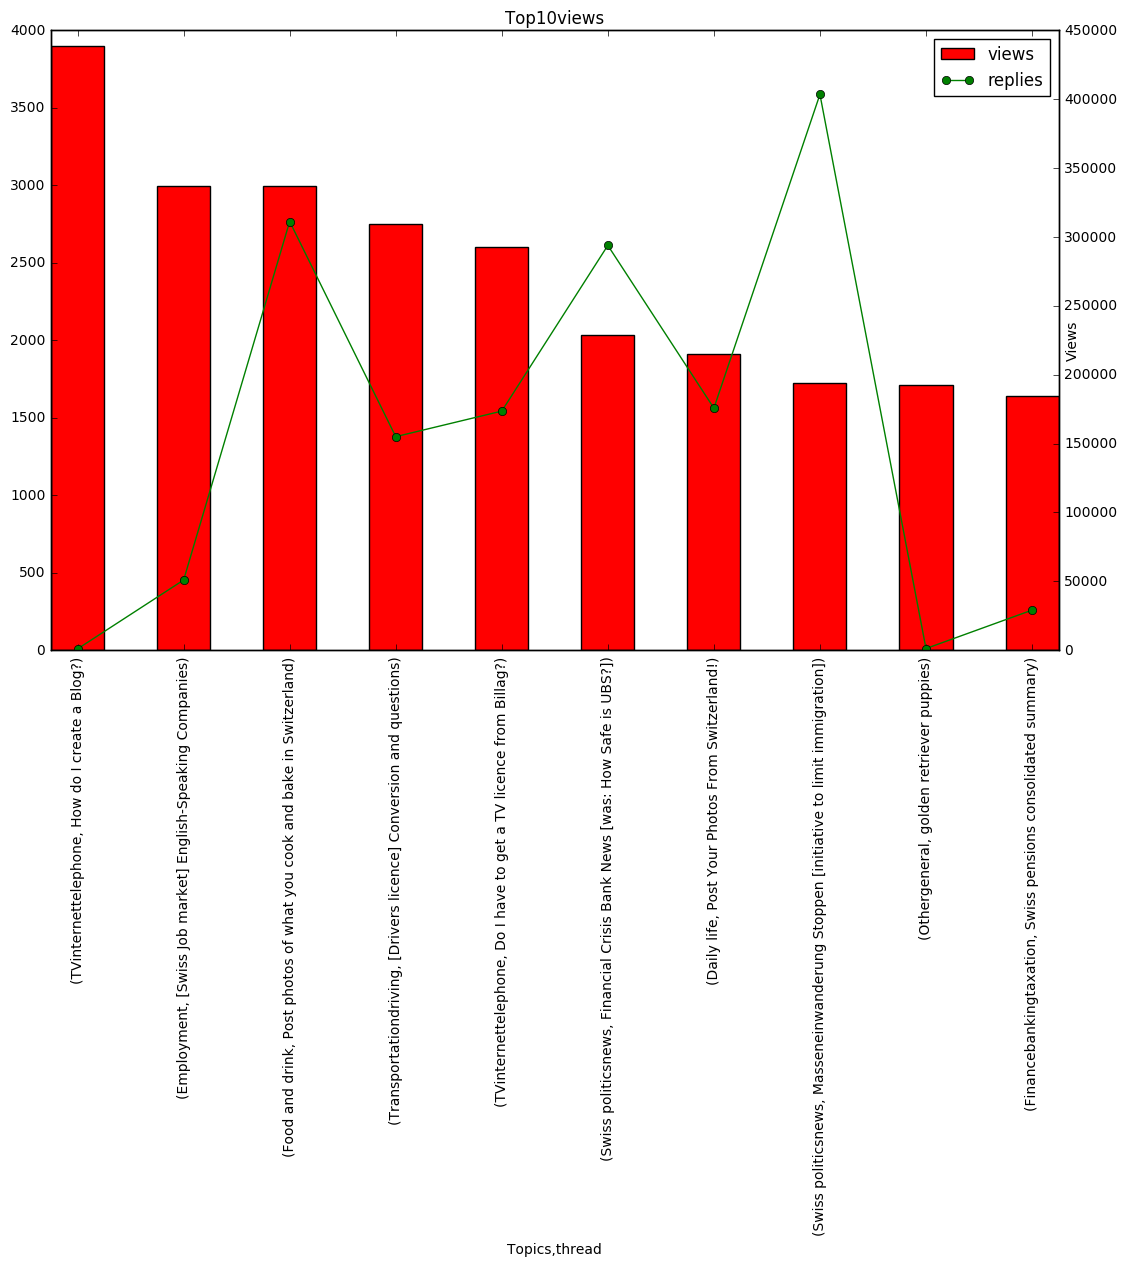

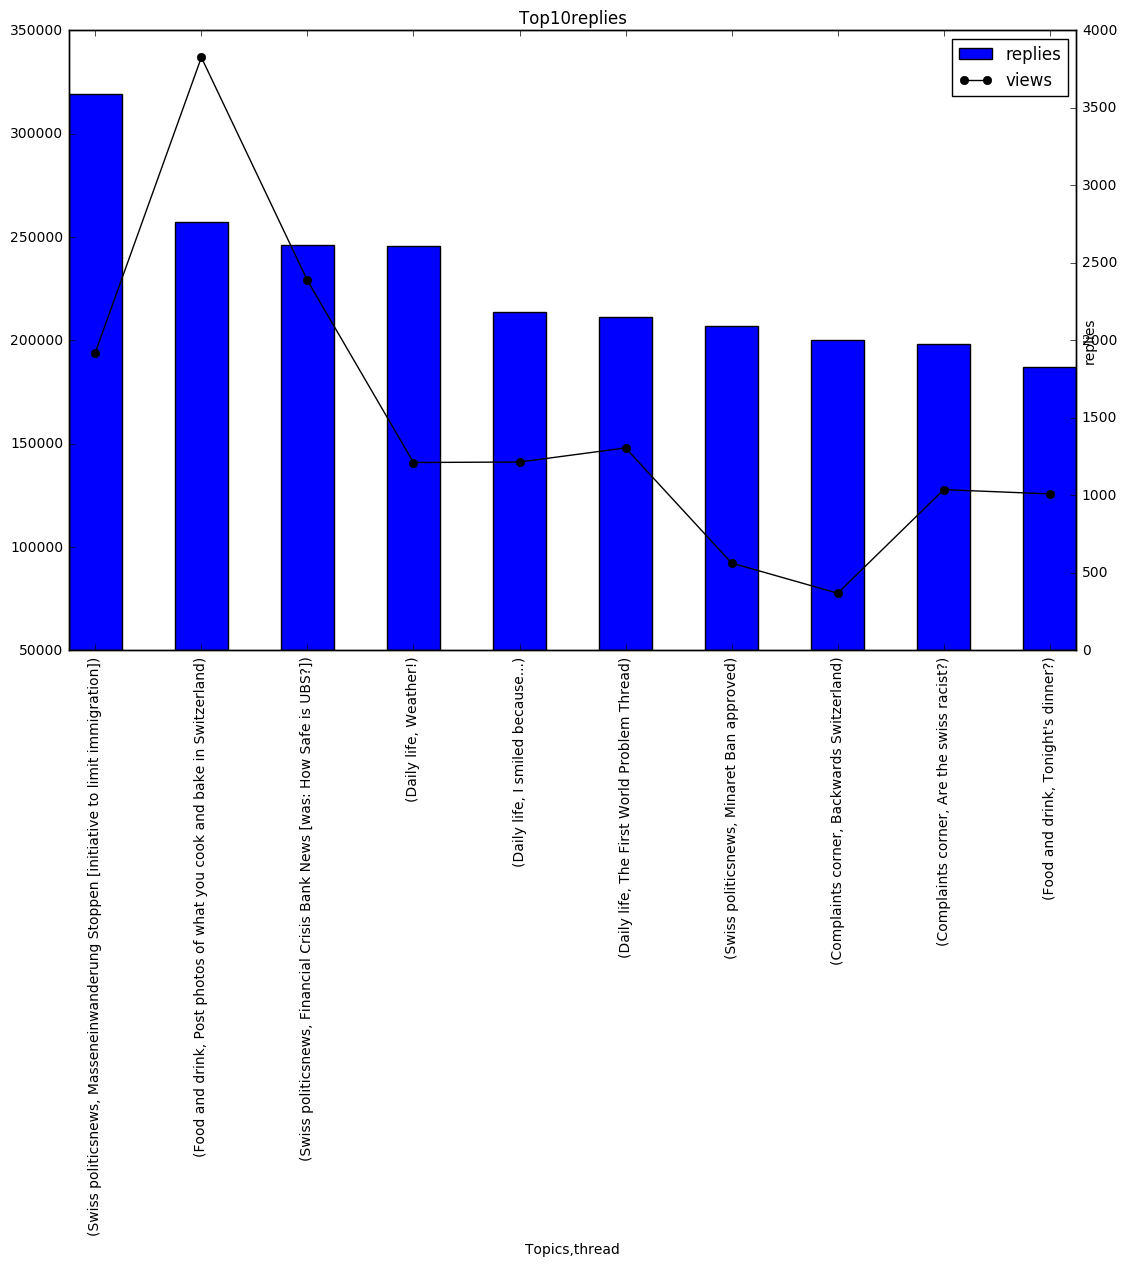

In [32]:
ax=top15views.drop(['replies'],1).plot.bar(figsize=(13,8),color='r')
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),top15views.drop(['views'],1),marker='o', color='g', linewidth=1.0, label='replies')
plt.title('Top10views')
plt.xlabel('Threads')
plt.ylabel('Views')
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='best')
ax.yaxis.set_ticks_position("right")
ax2.yaxis.set_ticks_position("left")
plt.show()
ax3=top15replies.drop(['views'],1).plot.bar(figsize=(13,8))
ax4 = ax3.twinx()
ax4.plot(ax3.get_xticks(),top15replies.drop(['replies'],1),marker='o', color='k', linewidth=1.0, label='views')
plt.title('Top10replies')
plt.xlabel('Threads')
plt.ylabel('replies')
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
ax3.legend(lines3 + lines4, labels3 + labels4, loc='best')
ax3.yaxis.set_ticks_position("right")
ax4.yaxis.set_ticks_position("left")
plt.show()

In [33]:
# It can only be run one time.
dfJoin=dfJoin.loc[dfJoin['since']!=('Location: lugano')] # There was one error on one of the downloaded thread.
dfJoin['since']=[datetime.strptime(x, ' %b %Y') for x in dfJoin['since']]

In the following steps we will analyse the growth of the forum over the years.

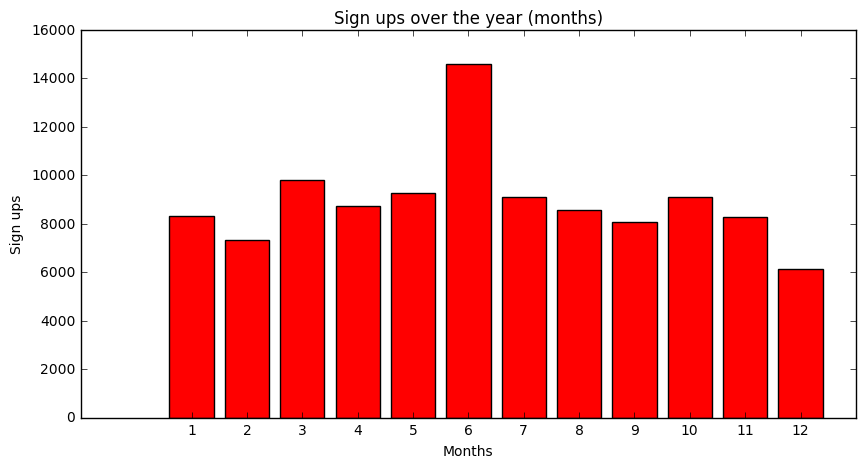

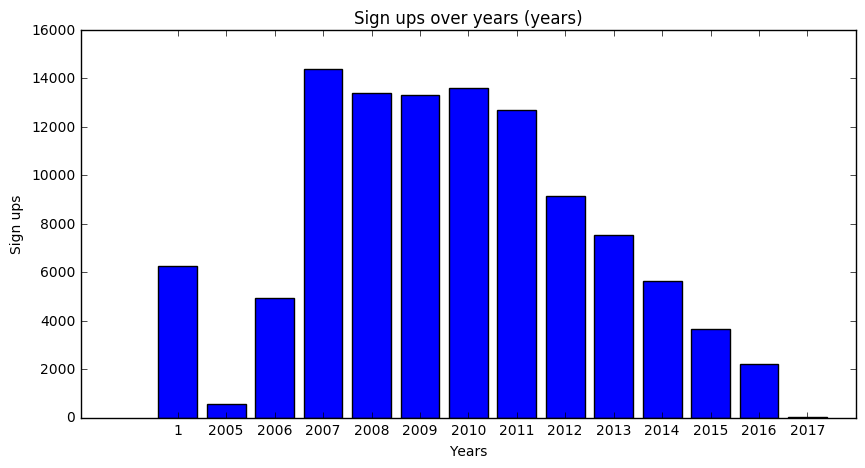

All 1s are null values


In [34]:
import collections
month_list=[date.month for date in dfJoin['since']]
year_list=[date.year for date in dfJoin['since']]

counter_month=collections.Counter(month_list)
counter_year=collections.Counter(year_list)
plt.figure(figsize=(10,5))
plt.bar(range(len(counter_month)), counter_month.values(), align='center',color='r')
plt.xticks(range(len(counter_month)), counter_month.keys())
plt.title("Sign ups over the year (months)")
plt.xlabel('Months')
plt.ylabel('Sign ups')
plt.show()
plt.figure(figsize=(10,5))
years=[tupla[0] for tupla in sorted(counter_year.items())]
years_val=[tupla[1] for tupla in sorted(counter_year.items())]
plt.bar(range(len(counter_year)), years_val, align='center')
plt.xticks(range(len(counter_year)), years)
plt.title("Sign ups over years (years)")
plt.xlabel('Years')
plt.ylabel('Sign ups')
plt.show()
print("All 1s are null values")

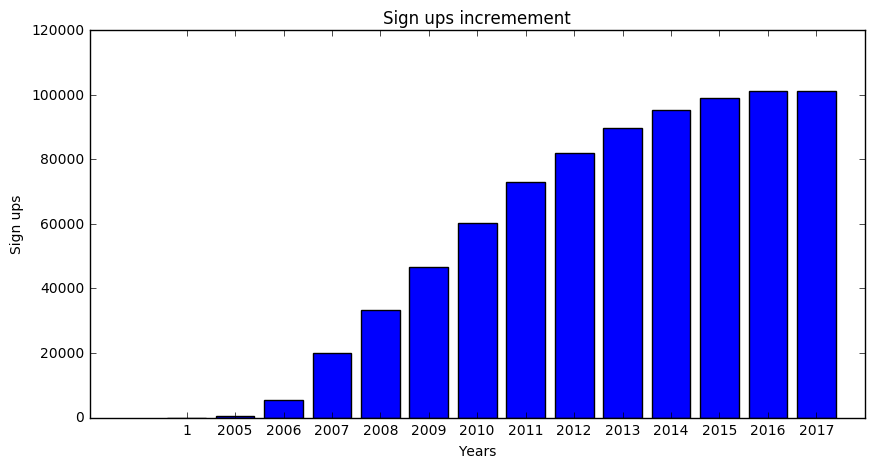

All 1s are null values


In [35]:
years_acum=[]
suma=0
years_val[0]=0
for acum in years_val:
    suma=suma+acum
    years_acum.append(suma)
plt.figure(figsize=(10,5))
years=[tupla[0] for tupla in sorted(counter_year.items())]
years_val=[tupla[1] for tupla in sorted(counter_year.items())]
plt.bar(range(len(counter_year)), years_acum, align='center')
plt.xticks(range(len(counter_year)), years)
plt.title("Sign ups incremement")
plt.xlabel('Years')
plt.ylabel('Sign ups')
plt.show()
print("All 1s are null values")

# Obj Saver
This will be excluded from GitHub beacuse of the objs sizes.

In [37]:
def save_obj(obj, name ):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

## WordCloud

For the Taming Text we will start generating some WordCloud for each topic, giving us an idea of which words are the ones that have more presence and remove useless words that could scape from our initial stopword. 
Instead of showing them all one the notebook, we will save them in localstorage.

In [38]:
from wordcloud import WordCloud, STOPWORDS
import nltk as nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stop = set(stopwords.words('english'))
stop.update([".",",","?",")","(",":","/","!","%","-",""])
stop.update(STOPWORDS)

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
wnl = WordNetLemmatizer()
forumTextContainer={}
i=0
for key in dfAuthors:
    temp=dfAuthors[key][['thread','post']]
    lista=[]
    print(i)
    print("There are %s null values" %temp.isnull().values.sum())
    temp=temp.dropna()
    for index,thread in temp.iterrows():
        allwords=[]
        text_tk = nltk.word_tokenize(thread['post']) 
        word_tag_fd = nltk.pos_tag(text_tk,tagset='universal') # for simplifying the task, we will une the universal tagset
        for wt in word_tag_fd:
            if  (wt[0] not in stop) and (wt[1] == 'NOUN' or wt[1] == 'ADJ'):
                allwords.append(wnl.lemmatize(wt[0]))
            elif (wt[0] not in stop) and (wt[1] == 'VERB'):
                allwords.append(wnl.lemmatize(wt[0],'v'))
                        
        if(len(allwords)>3): # We remove irrelevant posts
            lista.append((thread['thread'],allwords))
           
    forumTextContainer[key]=(lista)
    i+=1

save_obj(forumTextContainer, 'forumTextContainer') 



0
There are 0 null values
1
There are 0 null values
2
There are 0 null values
3
There are 61 null values
4
There are 0 null values
5
There are 0 null values
6
There are 0 null values
7
There are 0 null values
8
There are 0 null values
9
There are 0 null values
10
There are 0 null values
11
There are 0 null values
12
There are 0 null values
13
There are 0 null values
14
There are 0 null values
15
There are 0 null values
16
There are 0 null values
17
There are 0 null values
18
There are 0 null values
19
There are 0 null values
20
There are 0 null values
21
There are 0 null values
22
There are 0 null values
23
There are 0 null values
24
There are 0 null values


## Loading TK

In [40]:
# Loading threads tk. Only run it if you have the obj file (Running the previous cell)
forumTextContainer=load_obj('forumTextContainer')

/home/josele/anaconda3/lib/python3.5/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


dict_keys(['Sports  Fitness  Beauty  WellnessAuthors', 'Social eventsAuthors', 'Leaving SwitzerlandAuthors', 'ConcertsAuthors', 'TVinternettelephoneAuthors', 'Language cornerAuthors', 'FinancebankingtaxationAuthors', 'Complaints cornerAuthors', 'Swiss politicsnewsAuthors', 'Travelday tripsfree timeAuthors', 'Food and drinkAuthors', 'Commercial eventsAuthors', 'EducationAuthors', 'Pet cornerAuthors', 'IntroductionsAuthors', 'Swiss news via The LocalAuthors', 'OthergeneralAuthors', 'PermitsvisasgovernmentAuthors', 'InsuranceAuthors', 'Daily lifeAuthors', 'TransportationdrivingAuthors', 'Business & entrepreneurAuthors', 'Entertainment & diningAuthors', 'EmploymentAuthors', 'Family mattershealthAuthors'])


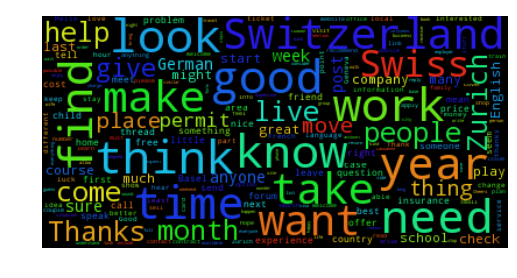

'Family mattershealthAuthors'

In [41]:
# forumTextContainer['Education'][0]
from collections import defaultdict
from nltk.probability import ConditionalFreqDist
from gensim import corpora, models, similarities
from gensim.models import  ldamodel
frequency = defaultdict(int)
# Counting the freq of the words in a topic. (stopwords already done)
print(forumTextContainer.keys())
for key in forumTextContainer:
    for thread in forumTextContainer[key]:
        for token in thread[1]:
            if len(token)>3:
                frequency[token] += 1
    # [(k, frequency[k]) for k in sorted(frequency, key=frequency.get, reverse=True)]
    words=[(k, frequency[k]) for k in sorted(frequency, key=frequency.get, reverse=True)]
    word_c=WordCloud()
    wordcloud = WordCloud(max_font_size=40,stopwords=stop).generate_from_frequencies(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.savefig(('wordcloud/'+key+'.png'))
plt.show()
key

## Topic modeling for threads

Tf–idf is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

For the topic modeling we will be using the tf–idf Vector Space Model algorithm (from gensim library).One reason for this selection is that 83% of text-based recommender systems in the domain of digital libraries. However, we will mix it with the lsimodel.
<a href="http://people.mpi-inf.mpg.de/~bast/ir-seminar-ws04/project-summaries/pleng_chirawatkul.pdf">LS
I
M
ode
l
wit
h
TF-
IDF
Term 
W
e
ight
i
n
g<a>

In [44]:
def modelingTopic(forumTextContainer,key):
    pp=pprint.PrettyPrinter(compact=1)
    frequency = defaultdict(int)
    # Here, we will count the frequency of the words in all the topic
    for thread in forumTextContainer[key]:
        for token in thread[1]:
            if len(token)>3:
                frequency[token] += 1
    # Now, we will remove words that have a small value of freq compared with the length of the thread.
    # We also organize our tokens in a list per thread
    texts = [[token for token in threads[1] if frequency[token]> math.ceil(len(threads[1])/15)] # The really huge topics are reduced
             for threads in forumTextContainer[key]]

    dictionary = corpora.Dictionary(texts)
    print(dictionary)
    corpus = [dictionary.doc2bow(text) for text in texts]
    tfidf = models.TfidfModel(corpus, normalize=True)
    return tfidf,dictionary,corpus
(tfidf,dictionary,corpus)=modelingTopic(forumTextContainer,'EducationAuthors')
corpus_tfidf = tfidf[corpus]
print("Number of threads: %d"%len(corpus_tfidf.corpus))

Dictionary(1698 unique tokens: ['intense', 'education', 'head', 'unusual', 'extend']...)
Number of threads: 1239


In [45]:

lsi = models.LsiModel(corpus_tfidf,id2word=dictionary, num_topics=10)
topics=[" ".join(re.findall("\"[a-z]+\"",topic[1])) for topic in lsi.print_topics(10,20)]
[(print("topic %d: %s \n" %(i,topic)) ) for (i,topic) in enumerate(topics)]

topic 0: "school" "child" "year" "know" "language" "local" "class" "need" "work" "look" "good" "teacher" "find" "think" "experience" "start" 

topic 1: "child" "school" "study" "course" "program" "anyone" "local" "class" "find" "look" "know" "university" "year" "teacher" "information" "apply" 

topic 2: "school" "language" "anyone" "course" "teach" "experience" "speak" "know" "information" "learn" "share" "child" "move" 

topic 3: "anyone" "speak" "work" "university" "language" "look" "student" "study" "thanks" "daughter" "need" "program" "child" 

topic 4: "school" "anyone" "study" "daughter" "thanks" "find" "offer" "post" "time" "course" "thing" "help" "month" "experience" "public" 

topic 5: "year" "anyone" "information" "school" "work" "luck" "good" "link" "look" "class" "study" "daughter" "post" 

topic 6: "look" "class" "move" "teacher" "year" "know" "place" "start" "think" "area" "daughter" "live" "teach" "anyone" "answer" 

topic 7: "good" "offer" "year" "think" "area" "group" 

[None, None, None, None, None, None, None, None, None, None]

Topic modeling vs just word frequency:

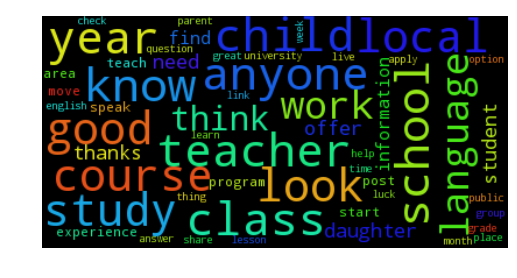

If we compare the topic modeling (by LSI-TFIDF) with the word counting repetition, we can see that the information that topic modeling gñive us is mora trustworthy.


In [46]:
topic_0=[topic for (i,topic) in enumerate(topics)]
wordcloud = WordCloud(max_font_size=40,stopwords=stop).generate(' '.join(topic_0))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
print("If we compare the topic modeling (by LSI-TFIDF) with the word counting repetition, we can see that the information that topic modeling gñive us is mora trustworthy.")

Previous wordcloud for the same topic:

<img style="float: left;" src='wordcloud/EducationAuthors.png'>

## Searching Queries
Lets give an example of what we can do with the topic modeling from before.
If we want to determine similarity between pairs of documents, or the similarity between a specific document and a set of other documents (such as a user query vs. indexed documents), we can use the previous work. We can performe similarities of our queries against each thread, obtaining a ranked score that show us the most related (by LSI-TFIDF) threads.

In our case, theads are in general long texts. Rasing the score of the results a lot because of the matches result

In [47]:
new_doc = "Study at the university EPFL in Lausanne with master thesis"
new_vec = dictionary.doc2bow(new_doc.lower().split())
# # index = similarities.SparseMatrixSimilarity(tfidf[corpus], num_features=12)
# index = similarities.Similarity('/tmp/tst', corpus, num_features=12)
vec_lsi = lsi[new_vec] # convert the query to LSI space
index = similarities.MatrixSimilarity(lsi[corpus]) # transform corpus to LSI space and index it
sims = index[vec_lsi] # perform a similarity query against the corpus
sims = sorted(enumerate(sims), key=lambda item: -item[1])
[(print("Thread: %s --> %s \n" %(forumTextContainer['EducationAuthors'][search[0]][0],search)) ) for search in sims[:10]]

Thread: How to get an admission at ETH Zurich? --> (1145, 0.97234237) 

Thread: multiplication and dividing symbols, why are they different? --> (749, 0.95725626) 

Thread: officially certified photocopies --> (164, 0.95267403) 

Thread: I would like  to know  any experience with the  ABMS university   or  OU --> (392, 0.92357498) 

Thread: Bachelors Business IT in English in Basel --> (799, 0.91835505) 

Thread: Swiss Education --> (323, 0.90512961) 

Thread: studing and working at the same time --> (713, 0.90248358) 

Thread: phd in switzerland --> (692, 0.90175921) 

Thread: Convert foreign Degree/Diploma in Switzerland --> (603, 0.89928371) 

Thread: Can anyone recommend me a place to catch up on university-level classes in Zurich? --> (485, 0.88824093) 



[None, None, None, None, None, None, None, None, None, None]

In [49]:
(tfidf,dictionary,corpus)=modelingTopic(forumTextContainer,'Pet cornerAuthors')
corpus_tfidf = tfidf[corpus]

new_doc = "Playing football in the EPFL"
new_vec = dictionary.doc2bow(new_doc.lower().split())
# # index = similarities.SparseMatrixSimilarity(tfidf[corpus], num_features=12)
# index = similarities.Similarity('/tmp/tst', corpus, num_features=12)
vec_lsi = lsi[new_vec] # convert the query to LSI space
index = similarities.MatrixSimilarity(lsi[corpus]) # transform corpus to LSI space and index it
sims = index[vec_lsi] # perform a similarity query against the corpus
sims = sorted(enumerate(sims), key=lambda item: -item[1])
[(print("Thread: %s --> %s \n" %(forumTextContainer['Pet cornerAuthors'][search[0]][0],search)) ) for search in sims[:10]]
# new_vec
top15views
forumTextContainer.keys()
# train with all, give a description an try to find the topic

Dictionary(2862 unique tokens: ['false', 'shame', 'obtain', 'disappoint', 'head']...)
Thread: The Vet Thread (Recommendations) --> (0, 0.0) 

Thread: The Pet Boarding Thread - Recommendations and Advice. NO ADS IN HERE --> (1, 0.0) 

Thread: Dogs: Federal SKN and Cantonal Obligatory Course and Trainer Recommendation Thread --> (2, 0.0) 

Thread: Important Info for Dog Owners: Change to Obligatory Registration Procedures --> (3, 0.0) 

Thread: Requirements For Dog Care Providers --> (4, 0.0) 

Thread: Tips on How To Report a Lost or Found Pet --> (5, 0.0) 

Thread: The Pet Sitting Network - Pet Details / Questions / Comments --> (6, 0.0) 

Thread: Flying with cats to US? --> (7, 0.0) 

Thread: 2016 Average (Private) Pet Care Cost Thread - your input needed! --> (8, 0.0) 

Thread: Any saluki/greyhound/whippet puppies in Lausanne area? --> (9, 0.0) 



dict_keys(['Sports  Fitness  Beauty  WellnessAuthors', 'Social eventsAuthors', 'Leaving SwitzerlandAuthors', 'ConcertsAuthors', 'TVinternettelephoneAuthors', 'Language cornerAuthors', 'FinancebankingtaxationAuthors', 'Complaints cornerAuthors', 'Swiss politicsnewsAuthors', 'Travelday tripsfree timeAuthors', 'Food and drinkAuthors', 'Commercial eventsAuthors', 'EducationAuthors', 'Pet cornerAuthors', 'IntroductionsAuthors', 'Swiss news via The LocalAuthors', 'OthergeneralAuthors', 'PermitsvisasgovernmentAuthors', 'InsuranceAuthors', 'Daily lifeAuthors', 'TransportationdrivingAuthors', 'Business & entrepreneurAuthors', 'Entertainment & diningAuthors', 'EmploymentAuthors', 'Family mattershealthAuthors'])

## Working with data

In [13]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
import sklearn as sklearn
from sklearn import preprocessing
topic_encoder = preprocessing.LabelEncoder()

dfJoinShuffle=shuffle(dfJoin)
dfJoinShuffle.topic=topic_encoder.fit_transform(dfJoinShuffle.topic)
# dfJoinShuffle['topic']=dfJoinShuffle['topic'].apply(lambda x: topicValues[x])
users_values=dfJoinShuffle['user'].value_counts()
for user in users_values.keys():
    if(users_values[user]>1 and len(dfJoinShuffle[dfJoinShuffle['user']==user])>1):
        oldest=dfJoinShuffle[dfJoinShuffle['user']==user]['date'].min()
        dfJoinShuffle=dfJoinShuffle.drop(dfJoinShuffle[(dfJoinShuffle['user']==user) & (dfJoinShuffle[dfJoinShuffle['user']==user]['date']!=oldest)].index)
dfJoinShuffle['user'].value_counts()


guest              5148
null               1015
Oz12                 14
joeyandmum           10
apartmentneeded       9
jeb210                6
Bubsie77              4
Dietiker              3
Miguel Nero           3
loakinbear            3
devcat                3
monia                 3
San Diego             3
laurence              3
aSwissInTheUS         3
Sarahzuri19           3
UncleMike988          2
deanobennetto         2
kelvinTo              2
SwissGirl2            2
LindsDerman           2
kansanalex            2
Autumn18              2
JennDH                2
Rig                   2
richierich            2
olduser               2
abrandonsmith         2
TitanTurbo10          2
NatAlexander          2
                   ... 
goattee               1
Jorida                1
SwissAsia             1
chvache               1
Rits_Zurich           1
MrP                   1
mepriana              1
nickf18               1
wellmood              1
daveintheusa          1
c85snp          

In [14]:
dfJoinShuffle=dfJoinShuffle.drop(dfJoinShuffle[dfJoinShuffle['user']=='guest'].index)
users=dfJoinShuffle['user'].value_counts()
duplicates=[]
for index,user in enumerate(users.keys()):
    if(users[index]>1):
        duplicates.append(user)
for user in duplicates:
    duplicated=dfJoinShuffle[dfJoinShuffle['user']==user]
#     print(len(duplicated),duplicated.index[1:])
    dfJoinShuffle=dfJoinShuffle.drop(duplicated.index[1:])
dfJoinShuffle['user'].value_counts()

Wespa              1
gretazeta          1
polcld             1
bos                1
Mibenata           1
gaurangi           1
tau_ba             1
JohnJN             1
yameanoda          1
ermida             1
jonip              1
danitimesdani      1
paman              1
aus_ch             1
myjumper21         1
Micro              1
couchsurfer        1
Health08           1
Madlen             1
applestrudel       1
KipperBlakeley     1
Damene Hepworth    1
GetemBuck          1
liddymatt          1
laurentiu375       1
Lakel              1
Tamas              1
John_H             1
Markabroad         1
racho              1
                  ..
TootPop            1
Dreamer~           1
olesk              1
Tonia2121          1
natalie76          1
tatehusband        1
ariffindavies      1
Moko               1
Braincake          1
zzzlaf             1
bge0               1
hanjulka           1
avsjayan           1
swisstooth         1
Matt14             1
sragarwal          1
archer       

# Let's predict using Naive Bayes

In [15]:
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

# model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# model.fit([dfJoinShuffle_aux.thread,dfJoinShuffle_aux.post,dfJoinShuffle_aux.location,dfJoinShuffle_aux.replies,dfJoinShuffle_aux.views]).ravel(), dfJoinShuffle_aux.topic)
# labels = model.predict(test.data)

dfJoinShuffle_aux=dfJoinShuffle.dropna()
# dfJoinShuffle_aux['date']=dfJoinShuffle_aux['date'].apply(lambda x: '%s'% (x.month))
# dfJoinShuffle_aux['since']=dfJoinShuffle_aux['since'].apply(lambda x: '%s'% (x.month))

# instantiate CountVectorizer
vect = CountVectorizer()
# define X and y
# X = dfJoinShuffle_aux.thread
X = dfJoinShuffle_aux.drop(['topic'],1)
# X = pd.Series([dfJoinShuffle_aux.date.astype('U'),dfJoinShuffle_aux.thread.astype('U'),dfJoinShuffle_aux.location.astype('U')])
y = dfJoinShuffle_aux.topic

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# fit and transform X_train into X_train_dtm
X_train_dtm = vect.fit_transform(X_train)
# print(X_train_dtm[:,0],X_train_dtm[:,1])
# plt.scatter(X_train, y_train, c=y_train,s=50, cmap='RdBu')
# plt.show()
# print(len(X_train_dtm[:,1]))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# type(X)
X_train=X_train['thread']+' '+X_train['location']+' '+X_train['post']+' '+X_train['date'].astype(str)
X_test=X_test['thread']+' '+X_test['location']+' '+X_test['post']+' '+X_test['date'].astype(str)

# print(X_train.shape)
# print(dx.reshape(len(X_train)))
# print(dfJoinShuffle_aux.date.values.astype('U'))

(24616, 13)
(8206, 13)
(24616,)
(8206,)


In [16]:
# fit and transform X_train into X_train_dtm
X_train_dtm = vect.fit_transform(X_train)
print(X_train_dtm.shape)
# transform X_test into X_test_dtm
X_test_dtm = vect.transform(X_test)
print(X_test_dtm.shape)
nb = MultinomialNB()
# train the model using X_train_dtm
nb.fit(X_train_dtm, y_train)
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)
# calculate accuracy of class predictions
print('accuracy rate:',metrics.accuracy_score(y_test, y_pred_class))
# nb.predict(vect.fit_transform('hola'.astype('U')))
# print(X_test[:]!=np.nan)

(24616, 44602)
(8206, 44602)
accuracy rate: 0.504630757982


We've realised that we can fetch up to 68% using only with thread name as feature

In [17]:
# from sklearn.cross_validation import train_test_split
# from sklearn.naive_bayes import MultinomialNB
# from sklearn import metrics

# define X and y
X = dfJoinShuffle_aux.thread
# X = pd.Series(dfJoinShuffle_aux.date,dfJoinShuffle_aux.thread,dfJoinShuffle_aux.location)
y = dfJoinShuffle_aux.topic
# split X and y into training and testing sets
#for more than 1 series
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# examine the object shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24616,)
(8206,)
(24616,)
(8206,)


In [18]:
# instantiate CountVectorizer
# vect = CountVectorizer()
# fit and transform X_train into X_train_dtm
X_train_dtm = vect.fit_transform(X_train)
print(X_train_dtm.shape)
# transform X_test into X_test_dtm
X_test_dtm = vect.transform(X_test)
print(X_test_dtm.shape)
nb = MultinomialNB()
# train the model using X_train_dtm
nb.fit(X_train_dtm, y_train)
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)
# calculate accuracy of class predictions
# metrics.accuracy_score(y_test, y_pred_class)
type(X_test_dtm)
def predictTopic(s,train=(X_test_dtm,X_train_dtm, y_train),model=nb):
    s=vect.transform(pd.Series([s]))
    pred=model.predict(s)[0]
    return topic_encoder.inverse_transform(pred)
print(predictTopic('study at EPFL'))
# topic_encoder.inverse_transform(nb.predict(vect.transform(pd.Series(['payment'])))[0])
# nb.predict(np.array(['create your own business']).astype('U'))
print('accuracy rate:',metrics.accuracy_score(y_test, y_pred_class))

(24616, 12463)
(8206, 12463)
Education
accuracy rate: 0.613941018767


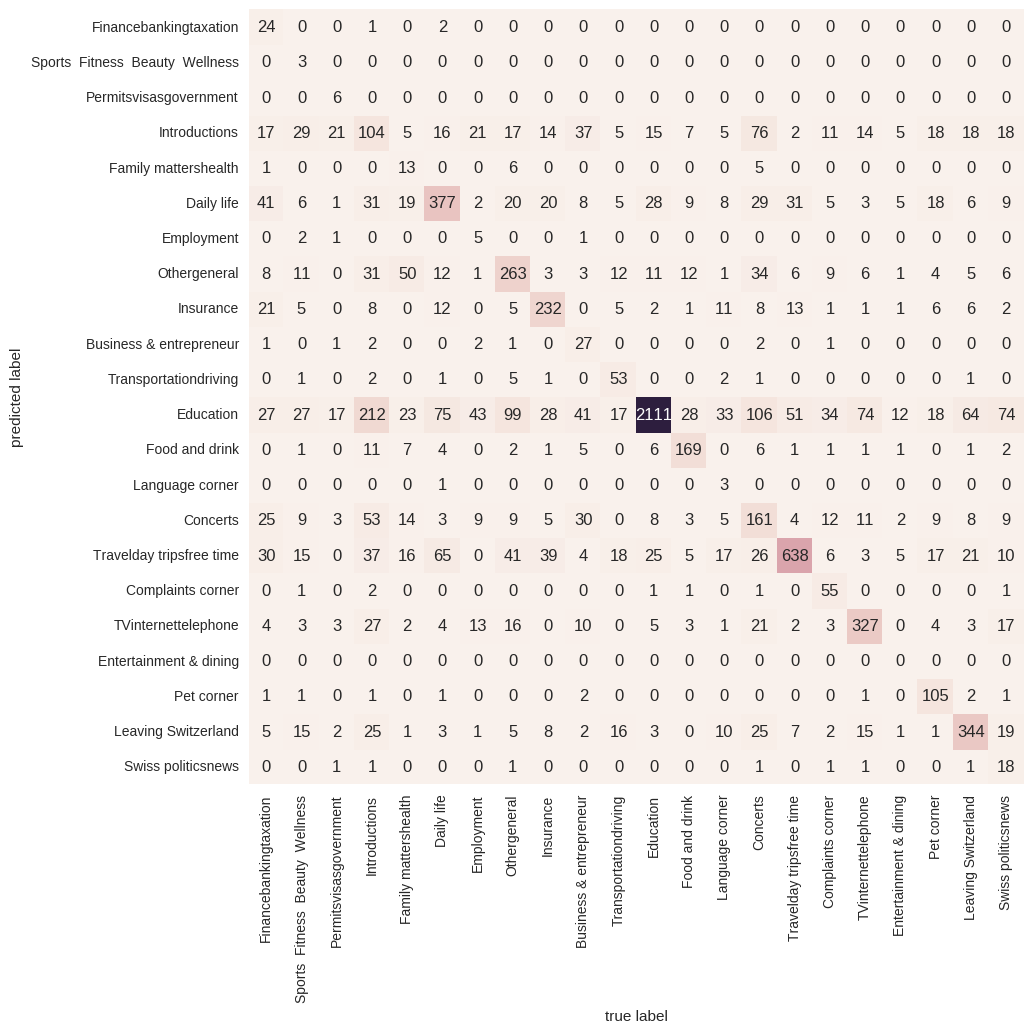

topic values
0 Financebankingtaxation
1 Sports  Fitness  Beauty  Wellness
2 Permitsvisasgovernment
3 Introductions
4 Family mattershealth
5 Daily life
6 Employment
7 Othergeneral
8 Insurance
9 Business & entrepreneur
10 Transportationdriving
11 Education
12 Food and drink
13 Language corner
14 Concerts
15 Travelday tripsfree time
16 Complaints corner
17 TVinternettelephone
18 Entertainment & dining
19 Pet corner
20 Leaving Switzerland
21 Swiss politicsnews
distribution of test
 12    2215
16     755
6      576
4      548
15     502
8      490
23     480
19     457
9      351
13     238
0      205
22     200
24     186
10     170
5      150
17     141
11     131
2      129
7       97
14      96
3       56
21      33
Name: topic, dtype: int64
null accuracy
 12    0.269924
Name: topic, dtype: float64


In [19]:
import seaborn as sns
def findAppearance(obj):
    setTopics=set()
    originalValues=[]
    for i in obj:
        if i not in setTopics:
            originalValues.append(i)
            setTopics.add(i)
    for index,i in enumerate(originalValues):
        originalValues[index]=topic_encoder.inverse_transform(i)
    return originalValues

tickLabels=findAppearance(y_test)
# print(findAppearance(y_pred_class))
# print(topicValues,print(y_pred_class.astype(set)))
# print the confusion matrix
plt.figure(figsize=(10,10))
matrix=metrics.confusion_matrix(y_test, y_pred_class)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=tickLabels, yticklabels=tickLabels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()
# examine the class distribution of the testing set
print('topic values')
for index,topic_value in enumerate(tickLabels):
    print(index,topic_value)

print('distribution of test\n',y_test.value_counts())
# calculate null accuracy
print('null accuracy\n',y_test.value_counts().head(1) / y_test.shape)

In [20]:
# first 10 false positives
X_test[y_test < y_pred_class].head(10)

10269           Where to watch the England game in zurich?
39659        Where to Rent Indoor Football Lausanne/Morges
2479                                    Bern area opinions
44780                     Marriage Help - Foreign Resident
47364    Looking For Guitar Teacher in Vevey/Montreux Area
2371           Rental deposit to landlord private account?
24137                     Car in lease and Steuererklärung
50620              Advertising in English speaking circles
19921                                  Two weeks in Zurich
48560                  Swiss Canadian Dual Citizen Divorce
Name: thread, dtype: object

In [21]:
# first 10 false negatives.
X_test[y_test > y_pred_class].head(10)

46765     A year or two off from Swiss school - what age...
101622          Where can I buy car stereo/audio connector?
54133                                  Asian Shop in Luzern
75934                                   Gymnastics in Bern?
104315            Strasbourg to Genoa - Bernard or Gottard?
44639                                  School opportunities
23120     Need suggestions for "real" swiss chalet close...
23025        Switzerland 12th February - 17th February 2010
67583                 The Best Month to move to Switzerland
59688             Good deal from "Die Post" on Ipad 2 and 3
Name: thread, dtype: object

# Let's predict using K-means

Nota: Borrar Support, que está vacio

In [32]:
dfAuthors['ConcertsAuthors'].head(3)
key

,topic,thread,user,views,replies,location,date,post,user_posts,since,exp,thanked,groaned,reputation
0,Concerts,"Switzerland Gigs ""Heads Up""",Yokine,151570,1100,Perthia,"06.05.2009, 16:20",Mod Insert: Please . Can't be bothered si...,1233.0,Mar 2006,5.0,"['901', '444']","['1', '1']",6
1,Concerts,Small bars/places with acoustic livemusic?,JHC,931,5,"Lenzburg, Aargau","19.11.2016, 19:45",\r\n\t\t\t\r\n\t\t\tI am living in Kanton Aar...,3.0,Nov 2016,0.0,"['0', '0']","['0', '0']",0
2,Concerts,Jazz clubs Zurich?,aromeroa,3849,16,Spain,"28.11.2015, 22:48",\r\n\t\t\t\r\n\t\t\tHello there! \r\nI am a...,6.0,Jul 2015,0.0,"['0', '0']","['0', '0']",0


In [23]:
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn import cross_validation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

k_means=KMeans(n_clusters=16)
# train the model using X_train_dtm
k_means.fit(X_train_dtm, y_train)
# make class predictions for X_test_dtm
y_pred_class = k_means.predict(X_test_dtm)
# calculate accuracy of class predictions
print('accuracy rate:',metrics.accuracy_score(y_test, y_pred_class))
# k_means.fit(X)
# correct=0
# for i in range(len(X)):
#     predict_me=np.array(X[i].astype(float))
# #     print(predict_me,predict_me.shape())
#     predict_me=predict_me.reshape(-1,len(predict_me))
# #     print(predict_me,predict_me.shape())
#     prediction=clf_topic.predict(predict_me)
#     if(prediction[0]==y[i]):
#         correct+=1
# print(correct/len(X))
# dfJoinShuffle_aux

accuracy rate: 0.0247379965879


/home/josele/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


In [30]:
min_max_scaler = preprocessing.MaxAbsScaler()
# for column in dfJoinShuffle_aux:
#     dfJoinShuffle_aux[column]=np_scaled = min_max_scaler.fit_transform(df)
locationsProc = preprocessing.LabelEncoder()
dfJoinShuffle_aux.location = locationsProc.fit_transform(dfJoinShuffle_aux.location)
print((dfJoinShuffle_aux.groaned.values))
scaled_values = min_max_scaler.fit_transform(dfJoinShuffle_aux.values)
# print(scaled_values)
# dfJoinShuffle_aux.columns
for index,column in enumerate(dfJoinShuffle_aux):
    dfJoinShuffle_aux[column]=pd.DataFrame(scaled_values)[index]
dfJoinShuffle_aux=dfJoinShuffle_aux.dropna()
# =pd.DataFrame(scaled_values)[0]
# dfJoinShuffle_aux['topic']

/home/josele/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


["['195', '121']" "['3', '1']" "['3', '2']" ..., "['2', '2']" "['0', '0']"
 "['0', '0']"]


ValueError: could not convert string to float: "['0', '0']"

In [107]:
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from sklearn.decomposition import TruncatedSVD
from sklearn import cross_validation
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
# from sklearn.cross_validation import train_test_split

pca_shuffle = TruncatedSVD(n_components=2).fit_transform(X_train_dtm,y_train)

# # Determine your k range
# k_range = range(1,20)

# # Fit the kmeans model for each n_clusters = k
# k_means_var = [KMeans(n_clusters=k).fit(pca_shuffle) for k in k_range]

# # Pull out the cluster centers for each model
# centroids = [X.cluster_centers_ for X in k_means_var]

# # Calculate the Euclidean distance from 
# # each point to each cluster center
# k_euclid = [cdist(pca_shuffle, cent, 'euclidean') for cent in centroids]
# dist = [np.min(ke,axis=1) for ke in k_euclid]

# # Total within-cluster sum of squares
# wcss = [sum(d**2) for d in dist]

# # The total sum of squares
# tss = sum(pdist(pca_shuffle)**2)/pca_shuffle.shape[0]

# # The between-cluster sum of squares
# bss = tss - wcss

# # elbow curve
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.plot(k_range, bss/tss*100, 'b*-')
# ax.set_ylim((0,100))
# plt.grid(True)
# plt.xlabel('n_clusters')
# plt.ylabel('Percentage of variance explained')
# plt.title('Variance Explained vs. k')
# plt.show()
# # print(pca_shuffle.shape[0],pca_shuffle.shape[1],fit1,len(fit1),dfJoinShuffle_aux.values)
# silhouette_score(fit, k_means_var[-1].labels_, metric='euclidean')
# # # fit.shape

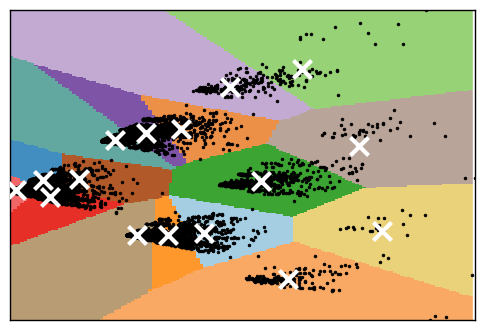

In [31]:
# run 8/random, 7/kmeans++ for silhouette
k_means = KMeans(n_clusters=16)
k_means.fit(pca_shuffle)

x_min, x_max = pca_shuffle[:, 0].min(), pca_shuffle[:, 0].max()
y_min, y_max = pca_shuffle[:, 1].min(), pca_shuffle[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Paired,
          aspect='auto', origin='lower')

plt.plot(pca_shuffle[:, 0], pca_shuffle[:, 1], 'k.', markersize=4)
# Plot the centroids as a white X
centroids = k_means.cluster_centers_
inert = k_means.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1],
           marker='x', s=169, linewidths=3,
           color='w', zorder=8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


In [ ]:
#silhouette_score(pca_shuffle,k_means.labels_, metric='euclidean') --> kernel breaks

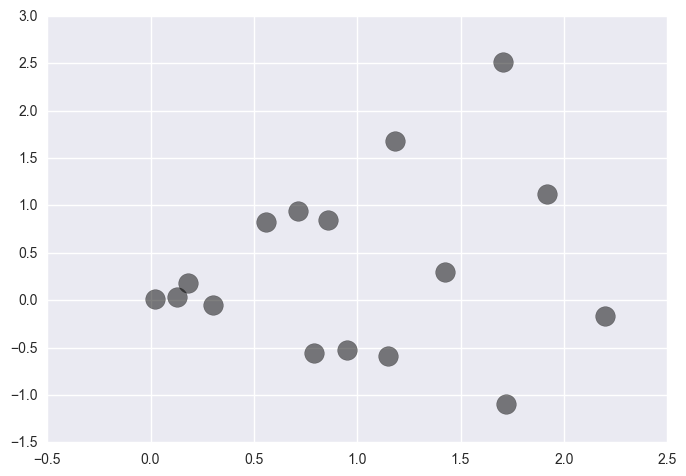

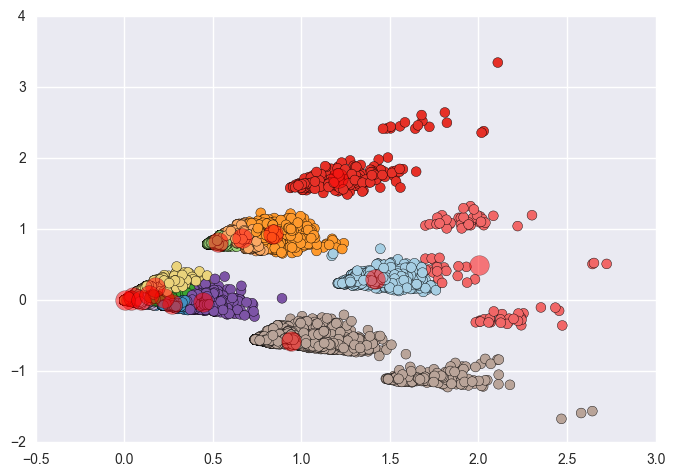

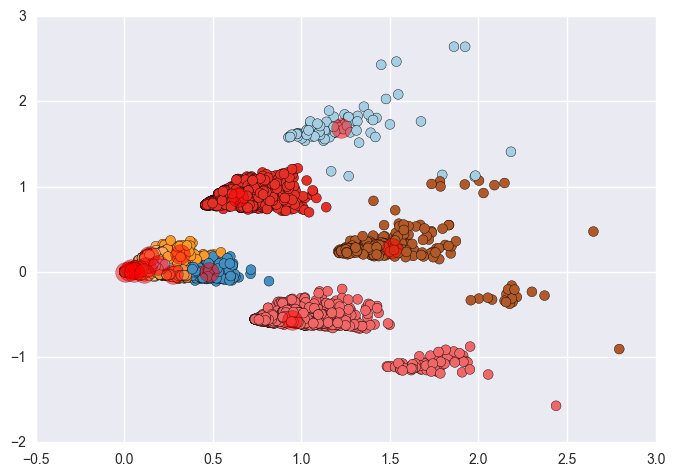

accuracy rate: 0.0377312560857


In [108]:
from sklearn.metrics import pairwise_distances_argmin
expectedPrediction=dfJoinShuffle['topic']
# min_max_scaler = preprocessing.MaxAbsScaler()

kmeans = KMeans(n_clusters=16)
kmeans.fit(pca_shuffle)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()
# method to readjust the cluster centers in order to optimize the minimum distance between centers
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest centersilhouette_score(pca_shuffle, labels, metric='euclidean')
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(pca_shuffle, 16)
plt.scatter(pca_shuffle[:, 0], pca_shuffle[:, 1], c=labels,s=50, cmap=plt.cm.Paired);
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
plt.show()
pca_shuffle_test = TruncatedSVD(n_components=2).fit_transform(X_test_dtm)

prediction=kmeans.predict(pca_shuffle_test)
centers, labels = find_clusters(pca_shuffle_test, 16)
plt.scatter(pca_shuffle_test[:, 0], pca_shuffle_test[:, 1], c=labels,
            s=50,cmap=plt.cm.Paired);
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
plt.show()
print('accuracy rate:',metrics.accuracy_score(y_test, prediction))